In [1]:
import pandas as pd
import numpy as np
import torch
import re
import tqdm
from matplotlib._path import (affine_transform, count_bboxes_overlapping_bbox,
     update_path_extents)


In [2]:
dataset=pd.read_csv('data/dataset.csv')

In [3]:
dataset.dropna(inplace = True) 

In [4]:
dataset.head(n=9)

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."


In [5]:
def clean_tweet(tweet):
    tweet = re.sub("#", "",tweet) # Removing '#' from hashtags
    tweet = re.sub("RT","",tweet)
    tweet = re.sub("[@][a-zA-Z0-9]*"," ",tweet)
    
    tweet = re.sub("[^a-zA-Z#]", " ",tweet) # Removing punctuation and special characters
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',"<URL>", tweet)
    tweet = re.sub('http','',tweet)
    tweet = re.sub(" +", " ", tweet)
    tweet = tweet.lower()
    return tweet

In [6]:
dataset["cleaned_tweet"]=dataset["tweet"].apply(clean_tweet)

In [7]:
dataset.head(n=9)

,id,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn t complain about clean...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to c...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,g anderson based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or i...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x the shit just blows me claim you so...
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate o...
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause i m tired of you big bitches coming for...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...


In [8]:
dataset.shape

(24783, 8)

In [9]:
print("number of tweets belonging to classes 0,1 and 2")
dataset.groupby('class')['id'].nunique()

number of tweets belonging to classes 0,1 and 2


class
0     1430
1    19190
2     4163
Name: id, dtype: int64

In [10]:
dataset.groupby('class')['id'].nunique().plot(kind='bar',title='Plot of number of tweets belonging to a particular class')

In [11]:
print("mean of hate_speeches for  classes 0,1 and 2")
dataset.groupby('class')['hate_speech'].mean()

mean of hate_speeches for  classes 0,1 and 2


class
0    2.256643
1    0.180459
2    0.062935
Name: hate_speech, dtype: float64

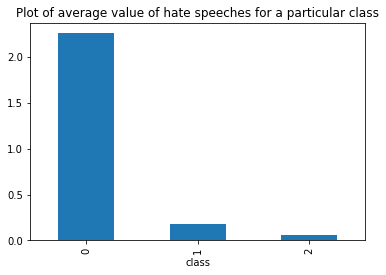

In [12]:
dataset.groupby('class')['hate_speech'].mean().plot(kind='bar',title='Plot of average value of hate speeches for a particular class')

In [13]:
print("mean of offensive_languages for classes 0,1 and 2")
dataset.groupby('class')['offensive_language'].mean()

mean of offensive_languages for classes 0,1 and 2


class
0    0.755944
1    3.003544
2    0.264233
Name: offensive_language, dtype: float64

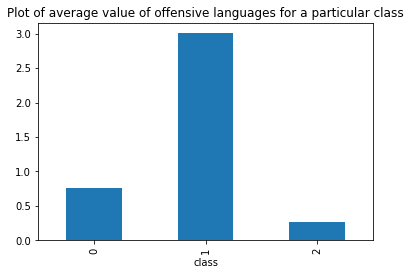

In [14]:
dataset.groupby('class')['offensive_language'].mean().plot(kind='bar', title='Plot of average value of offensive languages for a particular class')

In [15]:
print("mean of  neither of these two for classes 0,1 and 2")
dataset.groupby('class')['neither'].mean()

mean of  neither of these two for classes 0,1 and 2


class
0    0.095804
1    0.084888
2    2.845544
Name: neither, dtype: float64

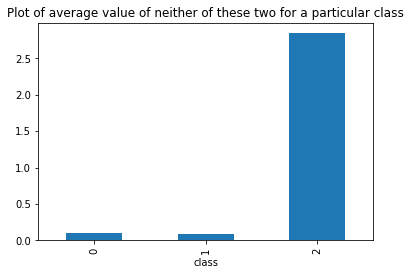

In [16]:
dataset.groupby('class')['neither'].mean().plot(kind='bar',title='Plot of average value of neither of these two for a particular class')

In [17]:
dataset["hate-speech_and_offensive"] = dataset["hate_speech"] + dataset["offensive_language"]

In [18]:
dataset.head(n=9)

,id,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet,hate-speech_and_offensive
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn t complain about clean...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe...,3
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to c...,3
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,g anderson based she look like a tranny,2
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or i...,6
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x the shit just blows me claim you so...,3
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate o...,3
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause i m tired of you big bitches coming for...,3
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...,3


In [19]:
print("mean of hate-speeches and offensive languages for classes 0,1 and 2")
dataset.groupby('class')['hate-speech_and_offensive'].mean()

mean of hate-speeches and offensive languages for classes 0,1 and 2


class
0    3.012587
1    3.184002
2    0.327168
Name: hate-speech_and_offensive, dtype: float64

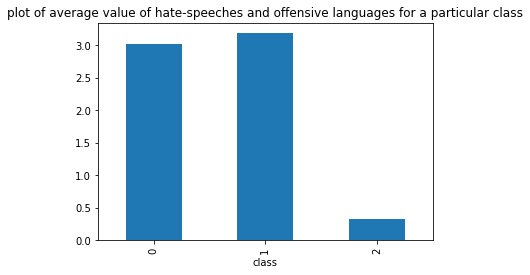

In [20]:
dataset.groupby('class')['hate-speech_and_offensive'].mean().plot(kind='bar',title="plot of average value of hate-speeches and offensive languages for a particular class")

In [21]:
dataset["hate-speech_and_neither"] = dataset["hate_speech"] + dataset["neither"]

In [22]:
dataset.head(n=9)

,id,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet,hate-speech_and_offensive,hate-speech_and_neither
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn t complain about clean...,0,3
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe...,3,0
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to c...,3,0
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,g anderson based she look like a tranny,2,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or i...,6,0
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x the shit just blows me claim you so...,3,1
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate o...,3,0
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause i m tired of you big bitches coming for...,3,0
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...,3,0


In [23]:
print("mean of hate-speeches and neither of these two for classes 0,1 and 2")
dataset.groupby('class')['hate-speech_and_neither'].mean()

mean of hate-speeches and neither of these two for classes 0,1 and 2


class
0    2.352448
1    0.265347
2    2.908479
Name: hate-speech_and_neither, dtype: float64

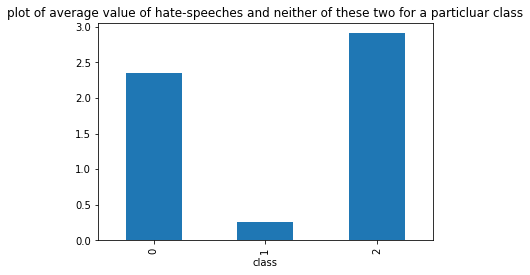

In [24]:
dataset.groupby('class')['hate-speech_and_neither'].mean().plot(kind='bar',title="plot of average value of hate-speeches and neither of these two for a particluar class")

In [25]:
dataset["offensive_and_neither"] = dataset["offensive_language"] + dataset["neither"]

In [26]:
dataset.head(n=9)


,id,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet,hate-speech_and_offensive,hate-speech_and_neither,offensive_and_neither
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn t complain about clean...,0,3,3
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe...,3,0,3
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to c...,3,0,3
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,g anderson based she look like a tranny,2,1,3
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or i...,6,0,6
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x the shit just blows me claim you so...,3,1,2
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate o...,3,0,3
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause i m tired of you big bitches coming for...,3,0,3
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...,3,0,3


In [27]:
print("mean of offensive languages and neither of these two for classes 0,1 and 2")
dataset.groupby('class')['offensive_and_neither'].mean()

mean of offensive languages and neither of these two for classes 0,1 and 2


class
0    0.851748
1    3.088431
2    3.109777
Name: offensive_and_neither, dtype: float64

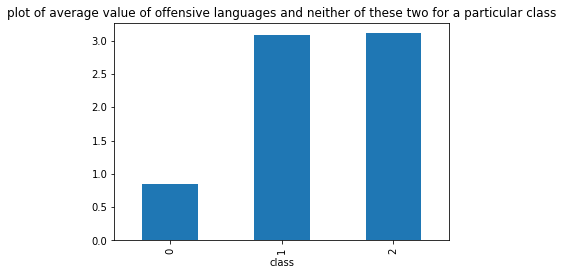

In [28]:
dataset.groupby('class')['offensive_and_neither'].mean().plot(kind='bar',title="plot of average value of offensive languages and neither of these two for a particular class")

In [29]:
print("mean of the count of all three categories(hate-speech,offensive_launguage,neither)for classes 0,1 and 2")
dataset.groupby('class')['count'].mean()

mean of the count of all three categories(hate-speech,offensive_launguage,neither)for classes 0,1 and 2


class
0    3.108392
1    3.268890
2    3.172712
Name: count, dtype: float64

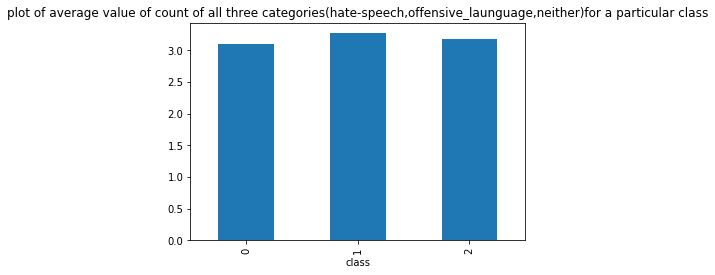

In [30]:
dataset.groupby('class')['count'].mean().plot(kind='bar',title='plot of average value of count of all three categories(hate-speech,offensive_launguage,neither)for a particular class')